## Figure 5

In [1]:
import sys
import os

# Get the absolute path to the project root (one directory up from notebooks/)
root_path = os.path.abspath("..")
sys.path.append(root_path)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src import figure_Tools as fT
from src import Random_bifurcations as rB


# needed datasets
df_point = pd.read_pickle("../Data/Point_data.pkl")
df_edges = pd.read_pickle("../Data/Edge_data.pkl")
df_bif = pd.read_pickle('../Data/Bifurication_data.pkl')


# (inelegantly) create a new dataframe which collapses together both parent to child angles
tmp_df_1 = pd.DataFrame(
    {
        "ID": df_bif.ID,
        "Type": df_bif.Type,
        "Subtype": df_bif.Subtype,
        "Parent_angle": df_bif.Parent_angle_1,
        "Child_angle": df_bif.Child_angle,
    }
)

tmp_df_2 = pd.DataFrame(
    {
        "ID": df_bif.ID,
        "Type": df_bif.Type,
        "Subtype": df_bif.Subtype,
        "Parent_angle": df_bif.Parent_angle_2,
        "Child_angle": df_bif.Child_angle,
    }
)

df = pd.concat((tmp_df_1, tmp_df_2))



### Figure 5a

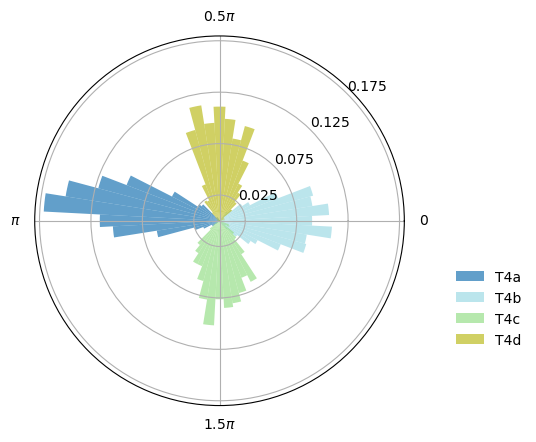

In [2]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})

fT.group_radar_plot(
    ax,
    df=df_point,
    dv_col="Mean_segment_angle",
    group_col="Subtype",
    groups=fT.Subtypes[0:4],
    colours=fT.Subtype_colours[0:4],
    plot_type="bar",
    bin_range=(-np.pi, np.pi),
    bins=60,
    alpha=0.7,
)
ax.legend(frameon=False, loc="upper right", bbox_to_anchor=(1.35, 0.4))
ax.set_yticks([0.025, 0.075, 0.125, 0.175])
ax.set_rlabel_position(40)

tick_locations = [0,np.pi/2, np.pi, np.pi + (np.pi/2)]
tick_labels = ["0","$0.5\pi$","$\pi$","$1.5\pi$"]
ax.set_xticks(tick_locations)
ax.set_xticklabels(tick_labels, fontsize = 10)
ax.set_rlabel_position(45)

### Figure 5b

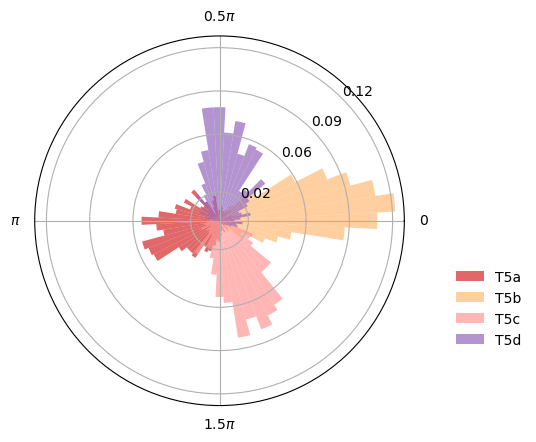

In [3]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})

fT.group_radar_plot(
    ax,
    df=df_point,
    dv_col="Mean_segment_angle",
    group_col="Subtype",
    groups=fT.Subtypes[4:],
    colours=fT.Subtype_colours[4:],
    plot_type="bar",
    bin_range=(-np.pi, np.pi),
    bins=60,
    alpha=0.7,
)
ax.legend(frameon=False, loc="upper right", bbox_to_anchor=(1.35, 0.4))
ax.set_yticks([0.02, 0.06, 0.09, 0.12])
ax.set_rlabel_position(130)
tick_locations = [0, np.pi / 2, np.pi, np.pi + (np.pi / 2)]
tick_labels = ["0", "$0.5\pi$", "$\pi$", "$1.5\pi$"]
ax.set_xticks(tick_locations)
ax.set_xticklabels(tick_labels, fontsize=10)
ax.set_rlabel_position(45)

### Figure 5d

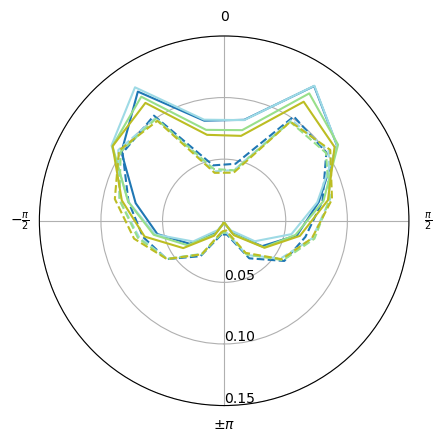

In [4]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})

given_Subtypes = ['T4a','T4b','T4c','T4d']
n_bins = 17
fT.radial_PMF(ax, df_edges, given_Subtypes, n_bins)
# ax.legend(frameon = False, loc = 'lower left', bbox_to_anchor = (-0.5,0))
ax.set_yticks([0.05,0.1,0.15])
ax.set_rlabel_position(180)

### Figure 5e

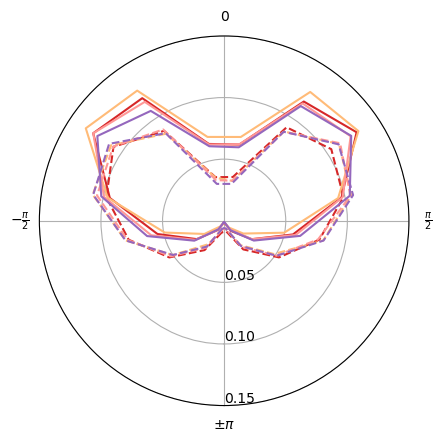

In [8]:
fig, ax = plt.subplots(subplot_kw={"projection": "polar"})

given_Subtypes = ['T5a','T5b','T5c','T5d']
n_bins = 17
fT.radial_PMF(ax, df_edges, given_Subtypes, n_bins)
# ax.legend(frameon = False, loc = 'lower left', bbox_to_anchor = (-0.5,0))
ax.set_yticks([0.05,0.1,0.15])
ax.set_rlabel_position(180)

### Figure 5g

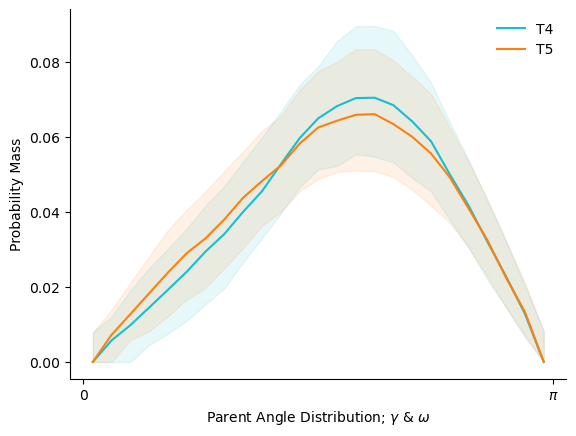

In [11]:
fig, ax = plt.subplots()

fT.repeated_measures_PMF_df(
    ax,
    df,
    "Parent_angle",
    "Type",
    fT.Types,
    fT.Type_colours,
    x0=0,
    x1=np.pi,
    num_bins=25,
    fill_kwargs={"alpha": 0.1},
)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("")
ax.set_ylabel("Probability Mass")
ax.set_xlabel(r"Parent Angle Distribution; $\gamma$ & $\omega$")
ax.set_xticks([0, np.pi], labels=["0", r"$\pi$"])
ax.legend(frameon=False)

### Figure 5h

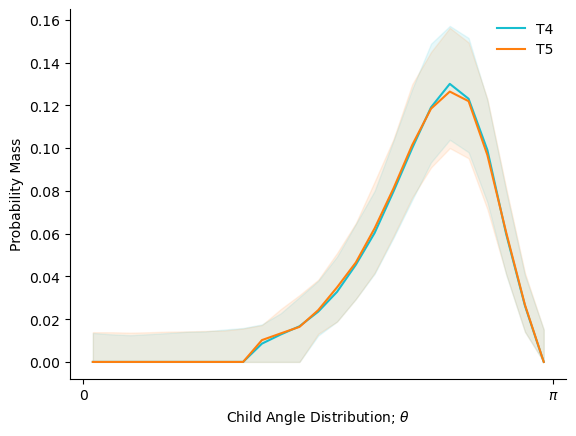

In [9]:
fig, ax = plt.subplots()

fT.repeated_measures_PMF_df(
    ax,
    df_bif,
    "Child_angle",
    "Type",
    fT.Types,
    fT.Type_colours,
    x0=0,
    x1=np.pi,
    num_bins=25,
    fill_kwargs={"alpha": 0.1},
)

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_title("")
ax.set_ylabel("Probability Mass")
ax.set_xlabel(r"Child Angle Distribution; $\theta$")
ax.set_xticks([0, np.pi], labels=["0", r"$\pi$"])
ax.legend(frameon=False)

### Figure 5i

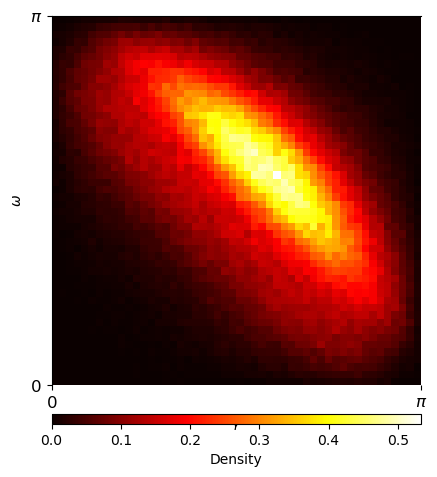

In [5]:
fig, ax = plt.subplots()

fT.angle_heatmap(ax, 'Parent_angle_1', 'Parent_angle_2', df_bif, 50, add_colorbar=True)
ax.set_xlabel(r"$\gamma$", fontsize = 10)
ax.set_ylabel(r"$\omega$", fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### Figure 5j

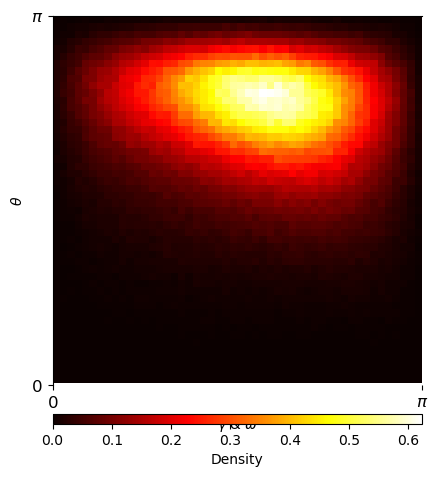

In [6]:
fig, ax = plt.subplots()
fT.angle_heatmap(ax, 'Parent_angle', 'Child_angle', df, 50)
ax.set_xlabel(r"$\gamma$ & $\omega$", fontsize = 10)
ax.set_ylabel(r"$\theta$", fontsize = 10)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### Generating random bifurcations

In [8]:
### T4
pc1 = df_point.loc[df_point.Type == 'T4', "PC1"].mean()
pc2 = df_point.loc[df_point.Type == 'T4', "PC2"].mean()
pc3 = df_point.loc[df_point.Type == 'T4', "PC3"].mean()

p_T4, c1_T4, c2_T4 = rB.generate_random_bifurication(10000, pc1, pc2, pc3)

### T5
pc1 = df_point.loc[df_point.Type == 'T5', "PC1"].mean()
pc2 = df_point.loc[df_point.Type == 'T5', "PC2"].mean()
pc3 = df_point.loc[df_point.Type == 'T5', "PC3"].mean()

p_T5, c1_T5, c2_T5 = rB.generate_random_bifurication(10000, pc1, pc2, pc3)


### Figure 5k

Text(0, 0.5, 'Probability Mass')

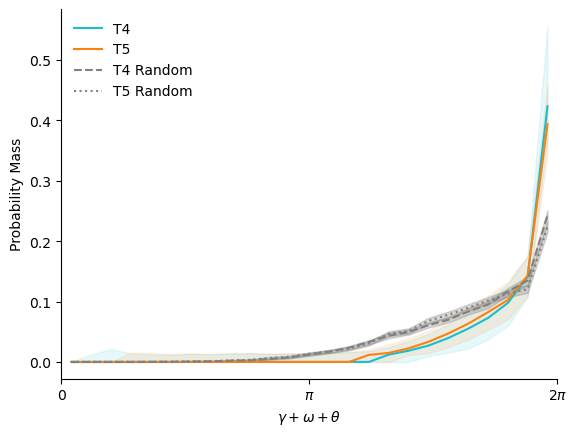

In [9]:
fig, ax = plt.subplots()

# observed data
fT.repeated_measures_PMF_df(
    ax,
    df_bif,
    "Angle_sum",
    "Type",
    fT.Types,
    fT.Type_colours,
    x0=0,
    x1=2 * np.pi,
    num_bins=25,
    fill_kwargs={"alpha": 0.1},
)

# random data
rand_sum = rB.random_bifurication_sum(p_T4, c1_T4, c2_T4)
fT.point_value_PMF_1darray(
    ax = ax,
    array = rand_sum,
    colour = "gray",
    label = "T4 Random",
    x0=0,
    x1=2 * np.pi,
    num_bins=25,
    num_bootstraps=100,
    line_kwargs={"ls": "--"},
    fill_kwargs={"alpha": 0.3},
)
rand_sum = rB.random_bifurication_sum(p_T5, c1_T5, c2_T5)
fT.point_value_PMF_1darray(
    ax = ax,
    array = rand_sum,
    colour = "gray",
    label = "T5 Random",
    x0=0,
    x1=2 * np.pi,
    num_bins=25,
    num_bootstraps=1000,
    line_kwargs={"ls": ":"},
    fill_kwargs={"alpha": 0.3},
)


ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks([0, np.pi, np.pi * 2], [0, "$\pi$", "$2\pi$"])
ax.set_xlabel(r"$\gamma + \omega + \theta$")
ax.legend(frameon=False)
ax.set_ylabel("Probability Mass");

### Figure 5l

Text(0, 0.5, 'Probability Mass')

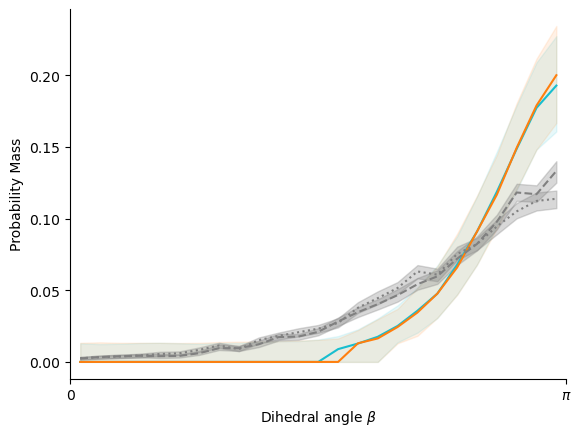

In [12]:
fig, ax = plt.subplots()

fT.repeated_measures_PMF_df(
    ax,
    df_bif,
    "Dihedral_Beta",
    "Type",
    fT.Types,
    fT.Type_colours,
    x0=0,
    x1=np.pi,
    num_bins=25,
    fill_kwargs={"alpha": 0.1},
)

# random
rand_db = rB.Dihedral_beta_random(p_T4, c1_T4, c2_T4)
fT.point_value_PMF_1darray(
    ax = ax,
    array = rand_db,
    colour = "gray",
    label = "T4 Random",
    x0=0,
    x1=np.pi,
    num_bins=25,
    num_bootstraps=100,
    line_kwargs={"ls": "--"},
    fill_kwargs={"alpha": 0.3},
)
rand_db = rB.Dihedral_beta_random(p_T5, c1_T5, c2_T5)
fT.point_value_PMF_1darray(
    ax = ax,
    array = rand_db,
    colour = "gray",
    label = "T5 Random",
    x0=0,
    x1=np.pi,
    num_bins=25,
    num_bootstraps=100,
    line_kwargs={"ls": ":"},
    fill_kwargs={"alpha": 0.3},
)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xticks([0, np.pi], [0, "$\pi$"])

ax.set_xlabel(r"Dihedral angle $\beta$")
ax.set_ylabel("Probability Mass")